In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
arr = np.array([0, 1, 2, 3, 4, 5])
print('Normalizando: ', (arr-arr.min()) / (arr.max() - arr.min()))
print('Estandarizando: ', (arr-arr.mean())/arr.std())

Normalizando:  [0.  0.2 0.4 0.6 0.8 1. ]
Estandarizando:  [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]


In [2]:
data = pd.read_csv('http://dicyg.fi-c.unam.mx:8080/lalo/pypcd/presentaciones/tallas.csv')
data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
altura,170,168,163,168,158,160,168,165,160,158,169,158,170,165,161,170,163,160,165,163
peso,64,62,60,63,63,60,66,61,59,59,67,58,63,65,60,68,61,64,62,64
talla,L,L,M,L,M,M,L,L,M,M,L,M,L,L,M,L,M,L,L,L


In [3]:
talla_map = {'L': 1, 'M': 0}
data['color'] = data.talla.map(talla_map)
data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
altura,170,168,163,168,158,160,168,165,160,158,169,158,170,165,161,170,163,160,165,163
peso,64,62,60,63,63,60,66,61,59,59,67,58,63,65,60,68,61,64,62,64
talla,L,L,M,L,M,M,L,L,M,M,L,M,L,L,M,L,M,L,L,L
color,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,1,1


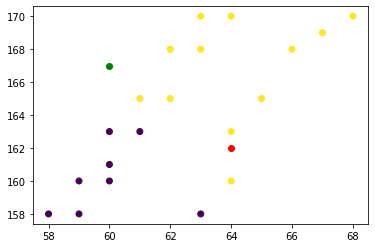

In [13]:
plt.scatter(data.peso, data.altura, c=data.color)

new = pd.DataFrame([[162, 64, None, None]])
new.columns = ['altura', 'peso', 'talla', 'color']
plt.scatter(new.peso, new.altura, c='r')

new2 = pd.DataFrame([[167, 60, None, None]])
new2.columns = ['altura', 'peso', 'talla', 'color']
plt.scatter(new2.peso, new2.altura, c='g')

plt.show()

In [48]:
def euclidean_(data, point):
    peso = data.peso.values
    altura = data.altura.values
    talla = data.talla.values
    dist = [[i, int((peso[i] - point.peso)**2 + (altura[i] - point.altura)**2), talla[i]] 
        for i in range(len(peso))]
    return dist

def get_closest_points(data, point, n=5):
    dist = pd.DataFrame(euclidean_(data, point))
    dist.columns = ['index', 'dist', 'talla']
    return dist.sort_values(by='dist').head(n)

def show_closest_points(data, point, cercanos, color='k'):
    plt.scatter(data.peso, data.altura, c=data.color)
    plt.scatter(point.peso, point.altura, color=color)
    for c in cercanos.values:
        p = data.loc[c[0], :]
        plt.plot(np.array([point.peso, p.peso]), np.array([point.altura, p.altura]))
    plt.show()

    index  dist talla
19     19     1     L
17     17     4     L
16     16    10     M
13     13    10     L
18     18    13     L


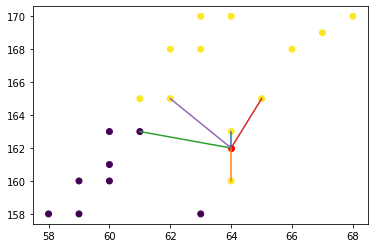

    index  dist talla
19     19     1     L
2       2     1     M
16     16     1     M
14     14     1     M
17     17     4     L


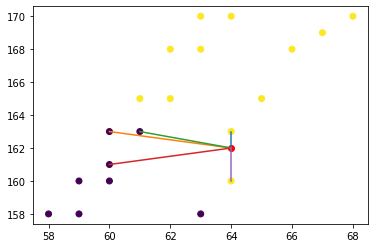

    index  dist talla
0       0     0     L
17     17     0     L
19     19     0     L
3       3     1     L
4       4     1     M


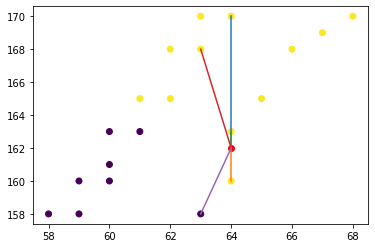

In [59]:
c = get_closest_points(data, new)
print(c)
show_closest_points(data, new, c, color='r')

#Tomando solo altura
altura = data[['altura', 'peso', 'talla', 'color']]
altura.peso = 0
new_a = new[['altura', 'peso', 'talla', 'color']]
new_a.peso = 0
c = get_closest_points(altura, new_a)
print(c)
show_closest_points(data, new, c, color='r')

#Tomando solo el peso
altura = data[['altura', 'peso', 'talla', 'color']]
altura.altura = 0
new_a = new[['altura', 'peso', 'talla', 'color']]
new_a.altura = 0
c = get_closest_points(altura, new_a)
print(c)
show_closest_points(data, new, c, color='r')

    index  dist talla
1       1     5     L
7       7     5     L
18     18     8     L
3       3    10     L
2       2    16     M


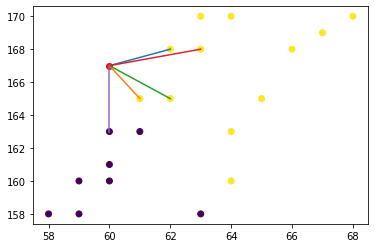

    index  dist talla
19     19     1     L
2       2     1     M
16     16     1     M
14     14     1     M
17     17     4     L


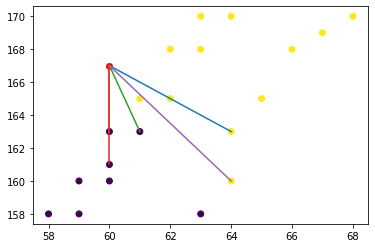

    index  dist talla
0       0     0     L
17     17     0     L
19     19     0     L
3       3     1     L
4       4     1     M


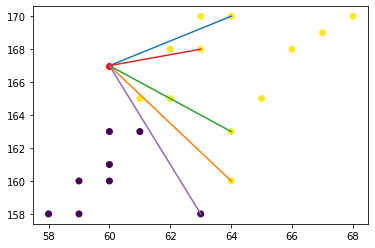

In [60]:
c = get_closest_points(data, new2)
print(c)
show_closest_points(data, new2, c, color='r')

#Tomando solo altura
altura = data[['altura', 'peso', 'talla', 'color']]
altura.peso = 0
new_a = new[['altura', 'peso', 'talla', 'color']]
new_a.peso = 0
c = get_closest_points(altura, new_a)
print(c)
show_closest_points(data, new2, c, color='r')

#Tomando solo el peso
altura = data[['altura', 'peso', 'talla', 'color']]
altura.altura = 0
new_a = new[['altura', 'peso', 'talla', 'color']]
new_a.altura = 0
c = get_closest_points(altura, new_a)
print(c)
show_closest_points(data, new2, c, color='r')

In [61]:
samples = data.sample(n=5)
samples

,altura,peso,talla,color
4,158,63,M,0
7,165,61,L,1
5,160,60,M,0
3,168,63,L,1
19,163,64,L,1
